# Spurious relations: data analysis

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import numpy.ma as ma
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
matplotlib.rcParams['lines.linewidth'] = 1.0
matplotlib.rcParams['lines.linestyle'] = '-'  
matplotlib.rcParams['lines.color'] = 'black'
 
#fonts & text
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'normal'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['text.usetex'] = True
 
#axes & ticks
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = 1.0  
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['axes.titlesize'] = 'large'
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['axes.labelweight'] = 'normal'
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.formatter.limits'] = [-4, 4]
 
matplotlib.rcParams['xtick.major.size'] = 7
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['xtick.major.pad'] = 6
matplotlib.rcParams['xtick.minor.pad'] = 6
# matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['xtick.minor.width'] = 1.0
matplotlib.rcParams['xtick.major.width'] = 1.0
 
matplotlib.rcParams['ytick.major.size'] = 7
matplotlib.rcParams['ytick.minor.size'] = 4
matplotlib.rcParams['ytick.major.pad'] = 6
matplotlib.rcParams['ytick.minor.pad'] = 6
# matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.minor.width'] = 1.0
matplotlib.rcParams['ytick.major.width'] = 1.0
 
#legends
matplotlib.rcParams['legend.numpoints'] = 1
# matplotlib.rcParams['legend.fontsize'] = 'x-large'
matplotlib.rcParams['legend.shadow'] = False
matplotlib.rcParams['legend.frameon'] = False

### Read in keywords

In [3]:
def get_keys(path='../docs/keywords.txt'):
    keys = np.genfromtxt(path, dtype="|S20", delimiter='#', autostrip=True)
    return keys.tolist()

In [4]:
keys = get_keys(path='../docs/keywords.txt')
print(keys)

['isis', 'terrorism', 'arab', 'spring', 'attack', 'god', 'christian', 'allah', 'islam', 'syria', 'refugees', 'migrants', 'africa', 'italy', 'ethiopia', 'asylum', 'unhcr', 'immigration', 'foreigners', 'crowded', 'ebola', 'guinea', 'sierra', 'leone', 'liberia', 'virus', 'epidemic', 'vaccine', 'who', 'influenza', 'flu', 'birds', 'swine', 'pig', 'bitcoin', 'rosetta', 'comet', 'higgs', 'climate', 'doomsday', 'maya', 'curiosity', 'sandy', 'hurricane', 'black', 'white', 'mandela', 'nelson', 'left', 'right', 'mh17', 'mh370', 'ukraine', 'crimea', 'russia', 'snowden', 'nsa', 'obama', 'putin', 'pope', 'unemployment', 'boston', 'marathon', 'london', 'europe', 'usa', 'philippines', 'sochi', 'olympics', 'geneva', 'apple', 'linux', 'PC', 'google', 'iphone', 'galaxy', 'watch', 'facebook', 'twitter', 'whatsapp', 'vegan', 'gluten', 'vegetarian', 'meat', 'pasta', 'banana', 'family', 'divorce', 'marriage', 'wedding', 'holidays', 'homework', 'television', 'coffee', 'tea', 'school', 'work', 'teacher', 'spor

In [5]:
keys = ['arab', 'attack', 'christian', 'gluten', 'god', 'isis', 'meat', 'obama', 'spring', \
       'terrorism', 'vegan', 'vegetarian']

### Read data

In [6]:
path2data = '../data/'
data = []
for key in keys:
    temp = np.genfromtxt(path2data+key+'.csv', dtype="|S20", delimiter=',', autostrip=True)
    data.append(temp.astype('int'))

In [7]:
def doy2date(doy):
    year = doy/1000
    days = doy%1000
    print(year.astype('string'))
    dates = np.array([np.datetime64(year[i].astype('string')) + np.timedelta64(days[i]-1, 'D') \
                     for i in range(year.shape[0])])
    return dates

### Create frequency arrays

In [8]:
days = [data[i][:,0] for i in range(len(data))]
days = tuple(days)
days = np.hstack(days)
firstday = np.amin(days)
lastday = np.amax(days)
# Create the array with all possible dates between first and last day
doys = np.arange(firstday, lastday+1)
dates = doy2date(doys)
print(dates)
# Default value for no observation: -1000
rawfrequency = -1000*np.ones((len(keys), dates.shape[0]))
meansubtfrequency = -1000*np.ones((len(keys), dates.shape[0]))
difference = -1000*np.ones((len(keys), dates.shape[0]-1))
for i in range(len(keys)):
    rawfrequency[i,:][data[i][:,0]-firstday] = data[i][:,1]
    meansubtfrequency[i,:][data[i][:,0]-firstday] = (data[i][:,1]-np.mean(data[i][:,1]))/np.mean(data[i][:,1])
    difference[i,:][data[i][:-1,0]-firstday] = (data[i][1:,1]-data[i][:-1,1])
print(rawfrequency)

['2014' '2014' '2014' '2014' '2014' '2014' '2014']
['2014-12-01' '2014-12-02' '2014-12-03' '2014-12-04' '2014-12-05'
 '2014-12-06' '2014-12-07']
[[  1.68000000e+02   1.98000000e+02   1.71000000e+02   2.21000000e+02
    1.84000000e+02   1.64000000e+02   1.90000000e+01]
 [  7.85000000e+02   9.88000000e+02   8.63000000e+02   8.51000000e+02
    7.97000000e+02   8.51000000e+02   1.10000000e+02]
 [  4.47000000e+02   5.87000000e+02   5.83000000e+02   5.53000000e+02
    5.64000000e+02   5.28000000e+02   6.80000000e+01]
 [  3.30000000e+01   6.10000000e+01   6.00000000e+01   5.00000000e+01
    6.10000000e+01   5.50000000e+01   3.00000000e+00]
 [  5.07700000e+03   7.93300000e+03   8.07200000e+03   7.65700000e+03
    7.46700000e+03   7.35200000e+03   1.16000000e+03]
 [  3.68000000e+02   5.24000000e+02   4.69000000e+02   3.64000000e+02
    3.97000000e+02   2.75000000e+02   4.70000000e+01]
 [  1.56000000e+02   2.39000000e+02   2.60000000e+02   3.52000000e+02
    2.13000000e+02   1.83000000e+02   3.0

### Apply k means clustering to the mean subtracted frequencies

In [9]:
# kmeans = KMeans(n_clusters=2)
# kmeans.fit(meansubtfrequency)

In [10]:
# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_

# print(centroids)
# print(labels)

### Compute correlation coefficient between the keywords

In [11]:
# mask = difference==-1000
# rawfrequency = ma.masked_array(difference, mask=mask)
# corrcoef = np.ma.corrcoef(difference)
# corrcoef.shape
# print(corrcoef)

Questions:

* Apply k means clustering to non mean subtracted data?

In [12]:
def dateaxis(doy):
    year = doy/1000
    days = doy%1000
    dates = [datetime.datetime(year[i], 1, 1) + datetime.timedelta(days[i] - 1) \
                     for i in range(year.shape[0])]
    return dates

In [13]:
dateax = dateaxis(doys)

In [14]:
colors = ['#5e4fa2', '#3288bd', '#66c2a5', '#abdda4', '#e6f598', '#fee08b', '#fdae61', '#f46d43', '#d53e4f', '#9e0142']

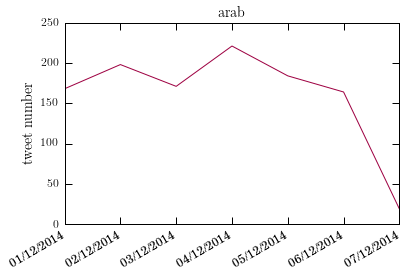

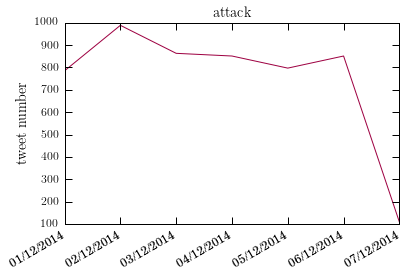

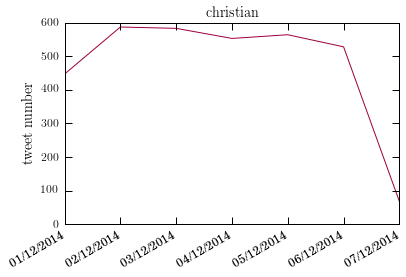

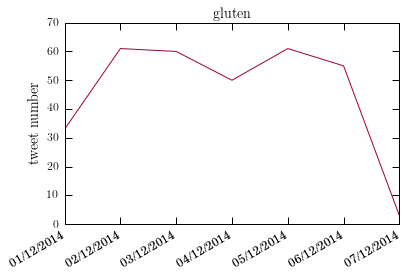

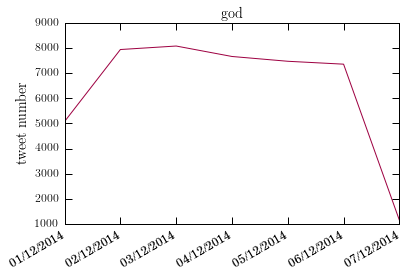

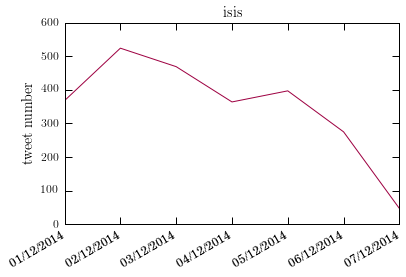

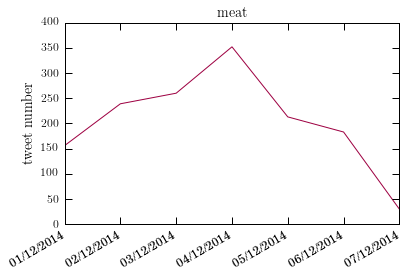

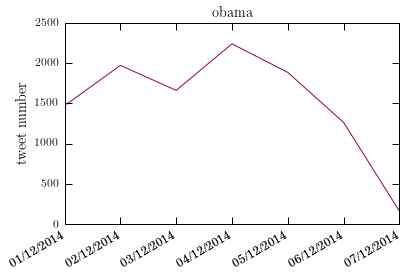

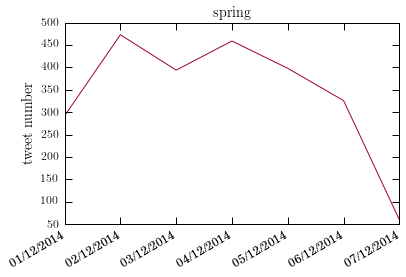

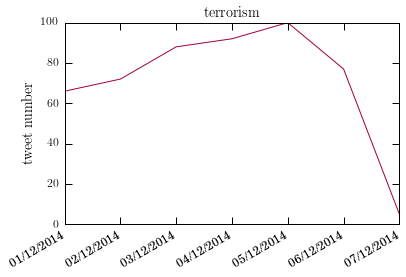

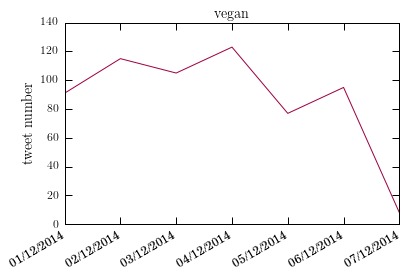

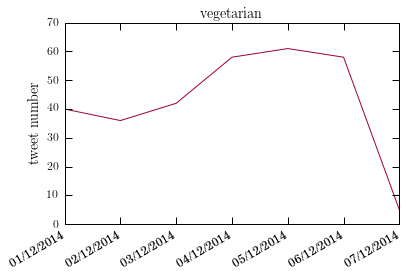

In [15]:
for i in range(len(keys)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.plot(dateax, rawfrequency[i,:], color=colors[9])
#     ax.set_xlabel(r'$\mathrm{DMY}$')
    ax.set_ylabel(r'$\mathrm{tweet}$ $\mathrm{number}$')
    ax.set_title(r'$\mathrm{%s}$'%keys[i])
    fig.autofmt_xdate()
    plt.show()

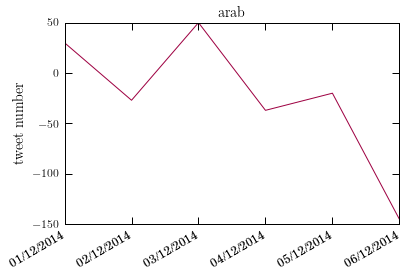

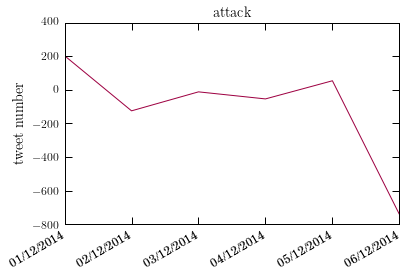

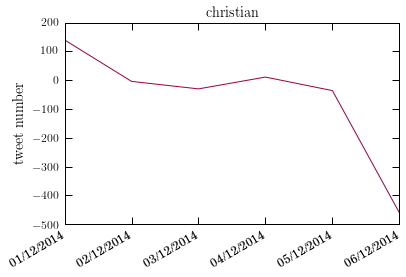

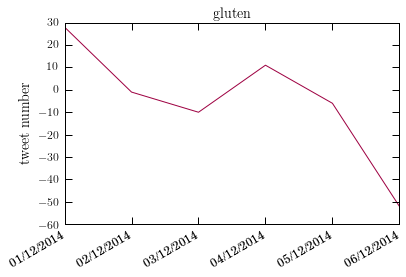

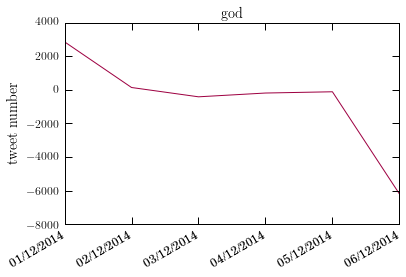

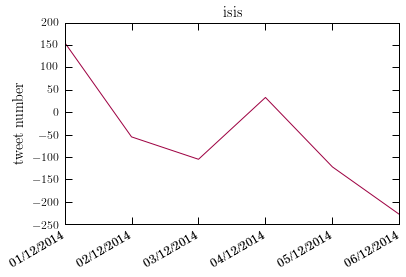

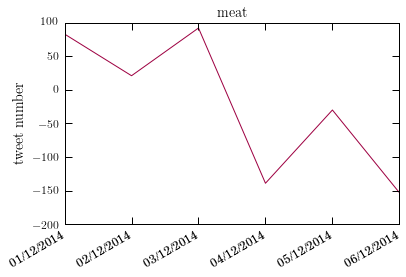

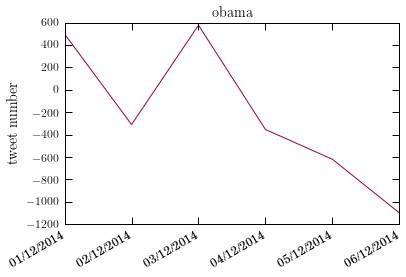

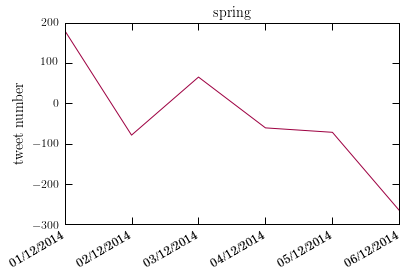

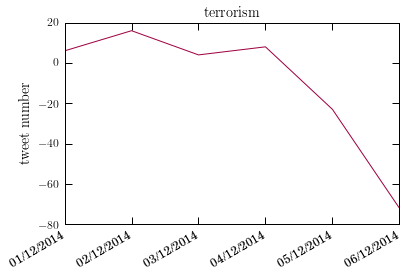

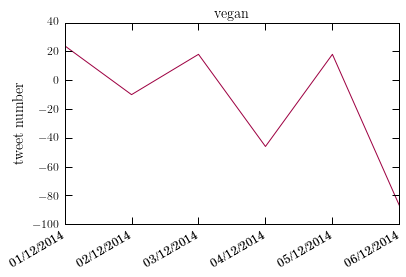

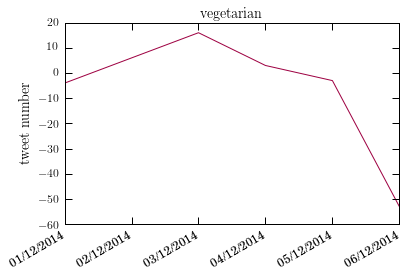

In [16]:
for i in range(len(keys)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.plot(dateax[:-1], difference[i,:], color=colors[9])
#     ax.set_xlabel(r'$\mathrm{DMY}$')
    ax.set_ylabel(r'$\mathrm{tweet}$ $\mathrm{number}$')
    ax.set_title(r'$\mathrm{%s}$'%keys[i])
    fig.autofmt_xdate()
    plt.show()

In [17]:
def autocorr(maxtimelag, timedata, timedata2=None):
    """
    Compute the autocorrelation function of time ordered data using the plug-in approach.
    :param timedata: 1D array of time-ordered data
    :param maxtimelag: maximal timelag for autocorrelation
    :return autocorr: aurocorrelation as a function of timelag
    """
    
    if timedata2 is None:
        nsteps = timedata.shape[0]
        var = np.var(timedata, ddof=0)
        timedata = timedata - np.mean(timedata)
        autocorr = np.array([1./(nsteps)*((timedata[:(nsteps-i)])*(timedata[i:])).sum()/var \
                     for i in range(0, maxtimelag)])
    else:
        nsteps = timedata.shape[0]
        var1 = np.var(timedata, ddof=0)
        var2 = np.var(timedata2, ddof=0)
        timedata1 = timedata - np.mean(timedata)
        timedata2 = timedata2 - np.mean(timedata2)
        autocorr1 = np.array([1./(nsteps)*((timedata2[:(nsteps-i)])*(timedata1[i:])).sum()/np.sqrt(var1*var2) \
                     for i in range(0, maxtimelag)])
        autocorr2 = np.array([1./(nsteps)*((timedata1[:(nsteps-i)])*(timedata2[i:])).sum()/np.sqrt(var1*var2) \
                     for i in range(1, maxtimelag)])
        autocorr = np.hstack((autocorr2[::-1], autocorr1))
    
    return autocorr

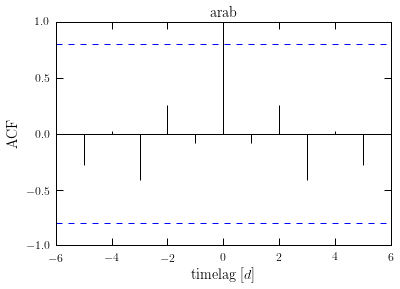

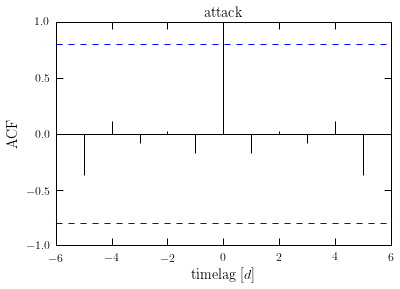

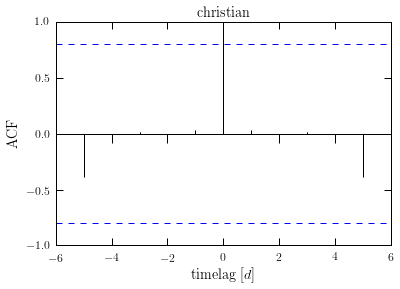

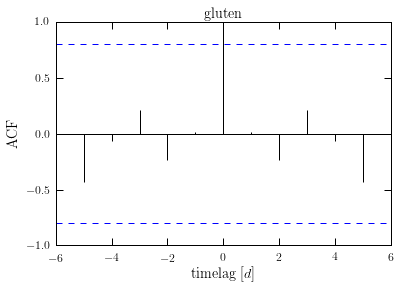

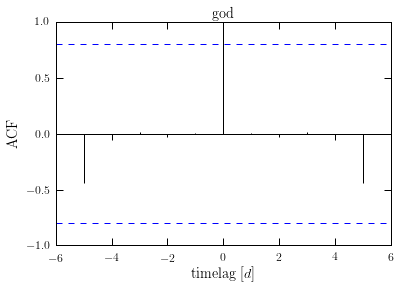

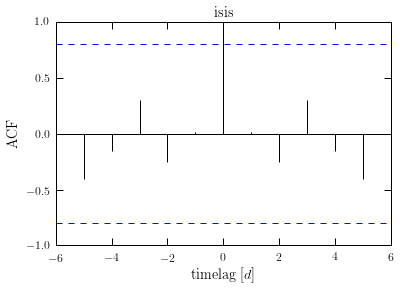

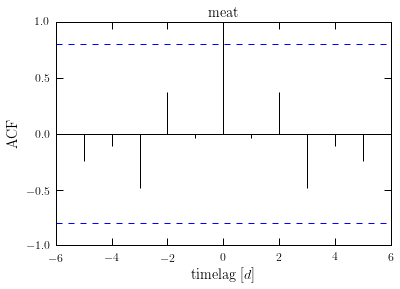

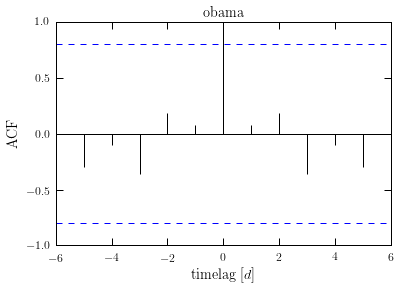

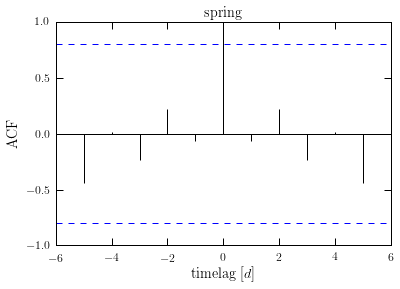

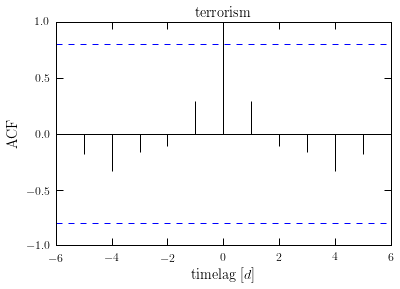

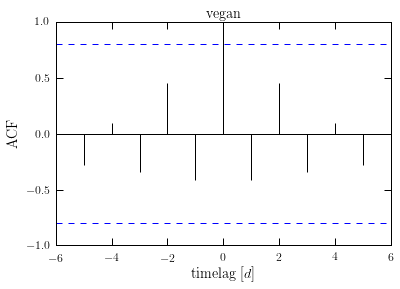

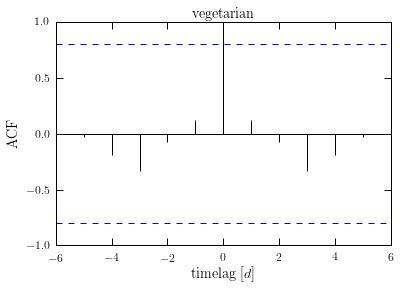

In [18]:
for i in range(len(keys)):
    nsample = difference[i,:].shape[0]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.acorr(difference[i,:]-np.mean(difference[i,:]), maxlags=None)
    ax.axhline(y=1.96*np.sqrt(1./nsample), color='b', linestyle='--')
    ax.axhline(y=-1.96*np.sqrt(1./nsample), color='b', linestyle='--')
    ax.set_xlabel(r'$\mathrm{timelag}$ $[d]$')
    ax.set_ylabel(r'$\mathrm{ACF}$')
    ax.set_title(r'$\mathrm{%s}$'%keys[i])
    plt.show()

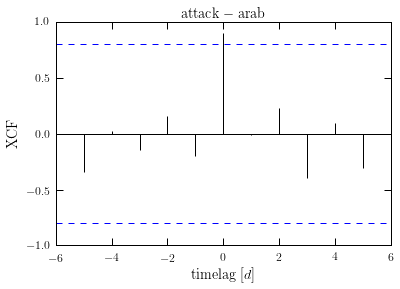

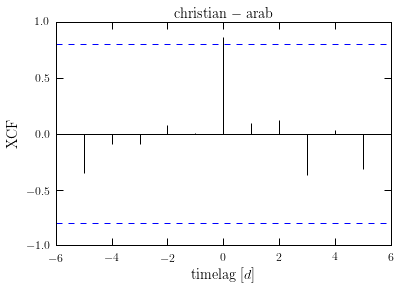

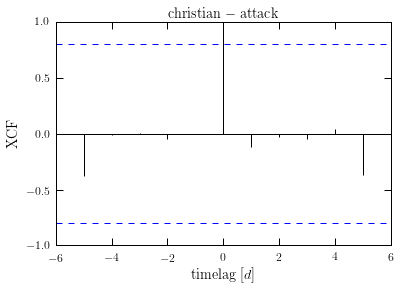

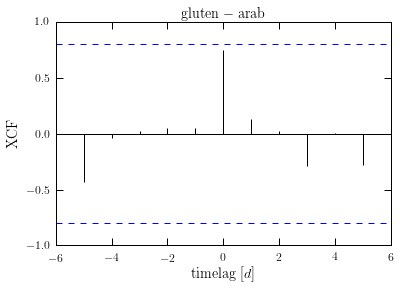

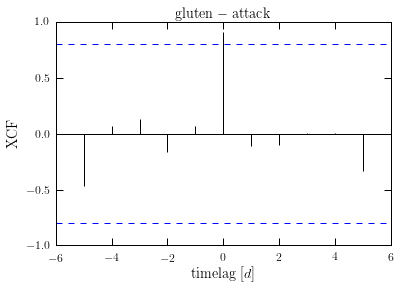

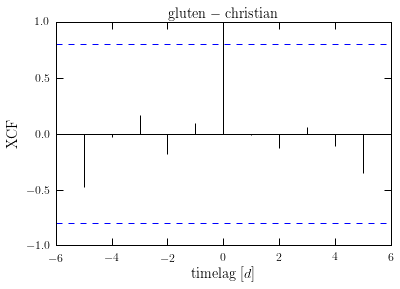

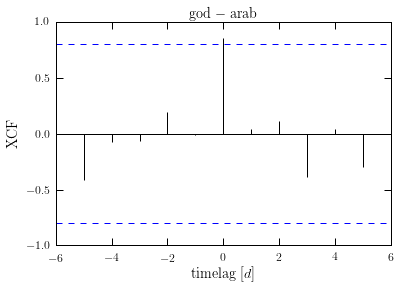

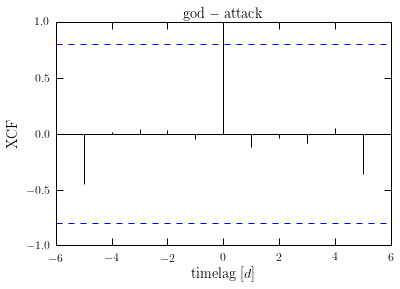

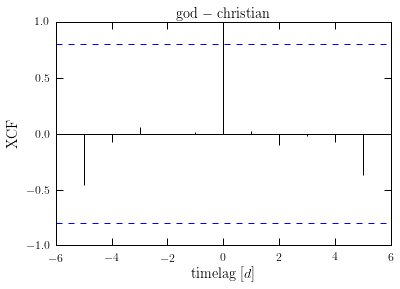

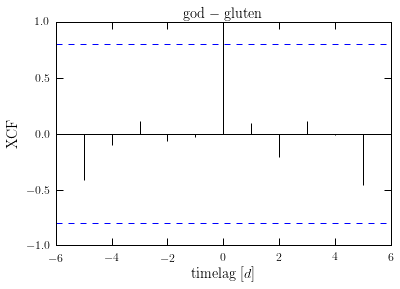

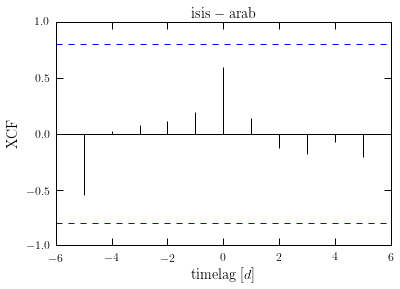

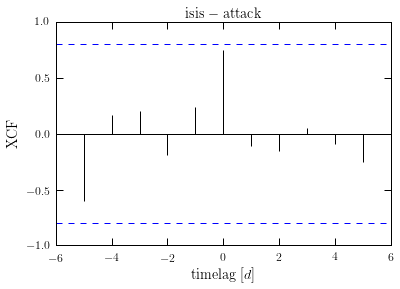

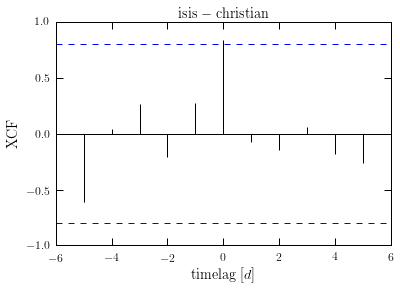

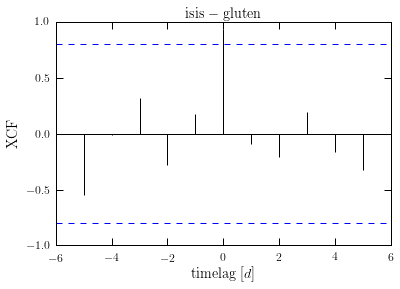

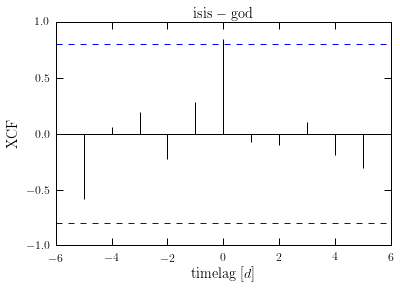

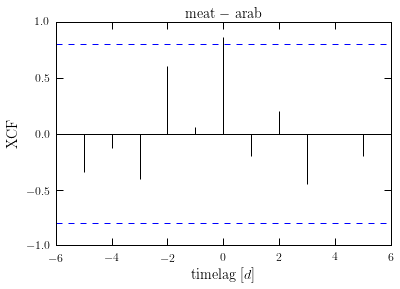

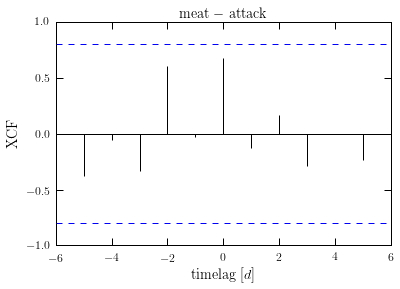

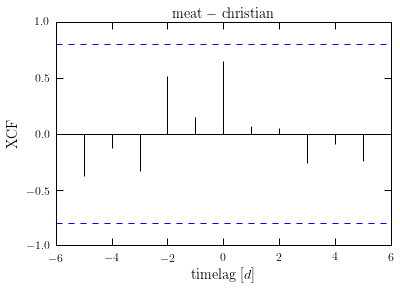

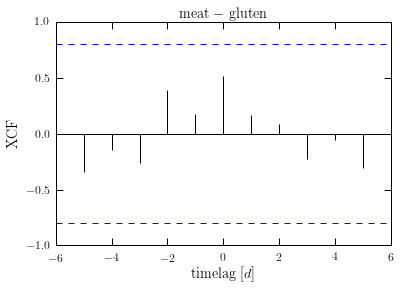

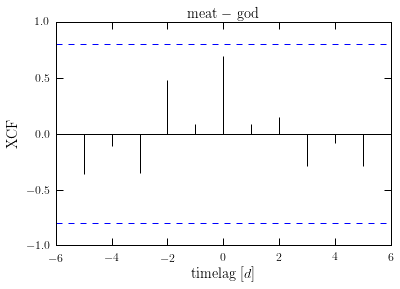

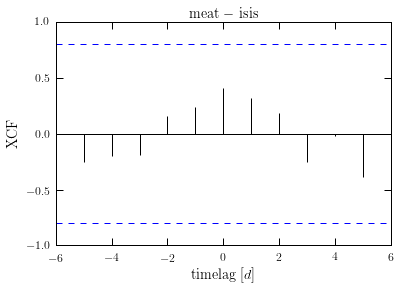

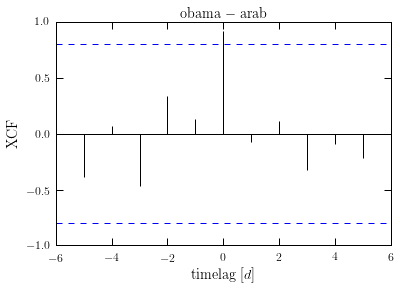

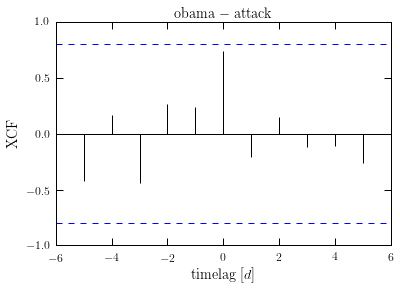

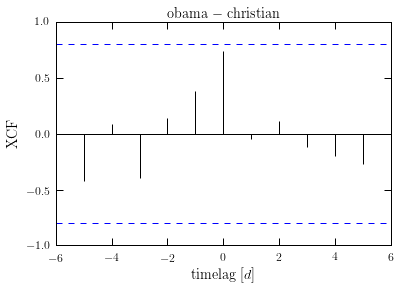

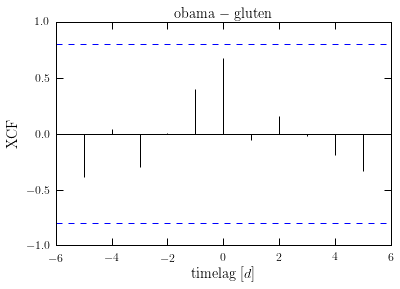

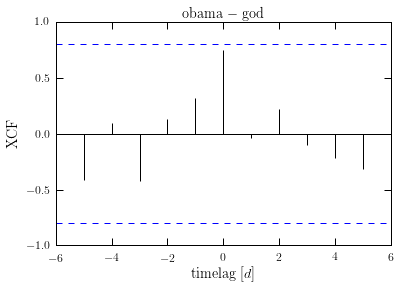

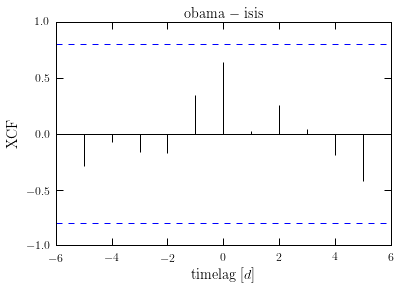

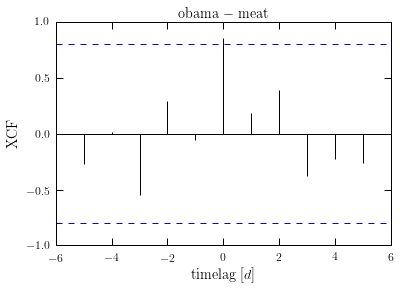

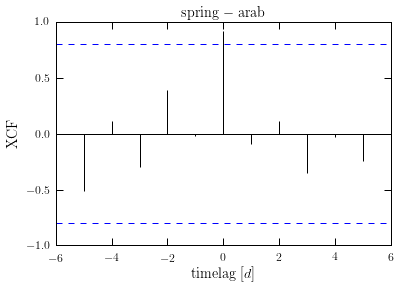

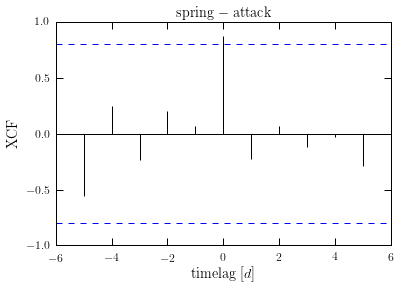

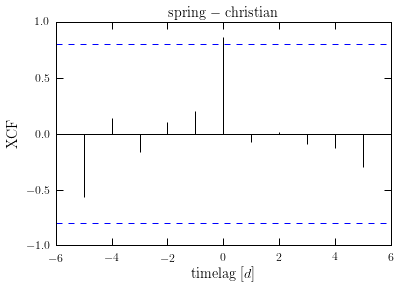

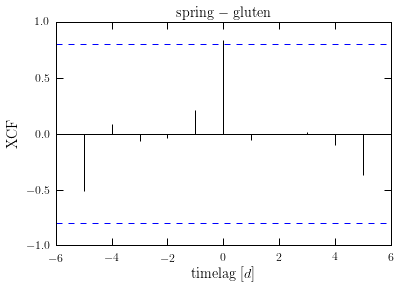

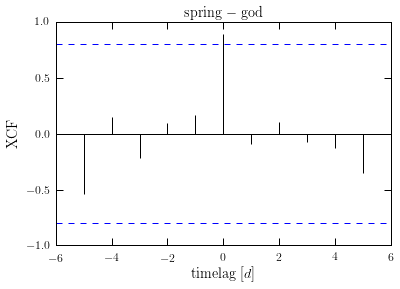

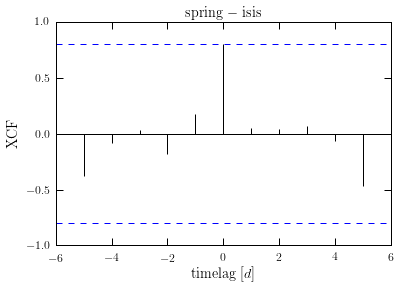

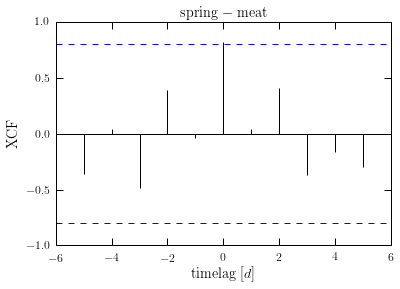

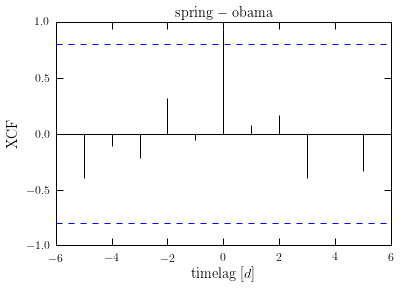

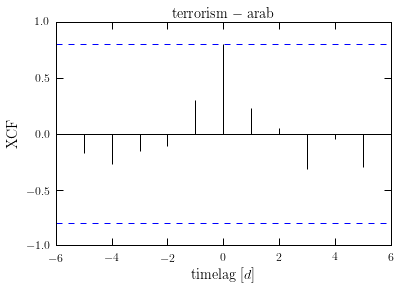

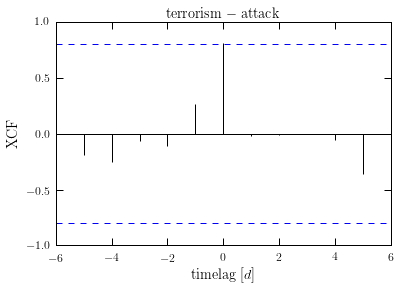

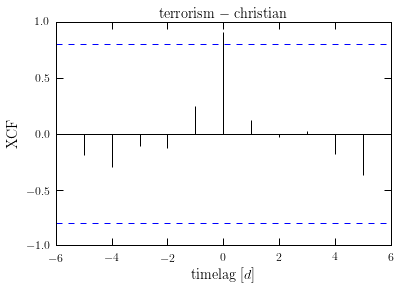

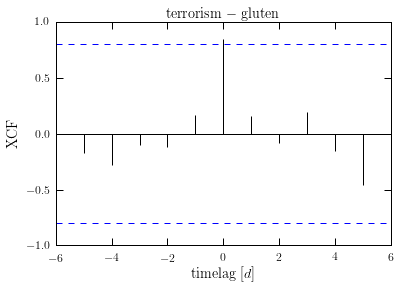

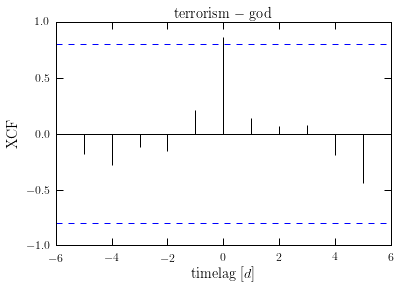

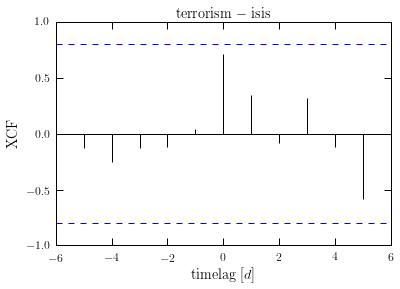

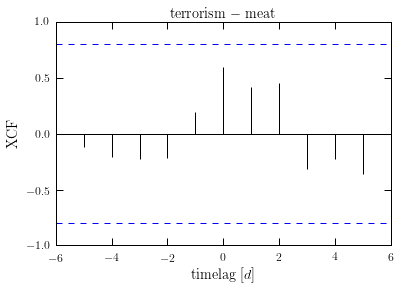

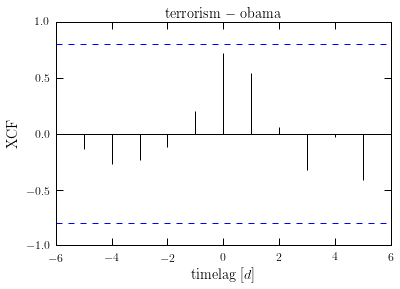

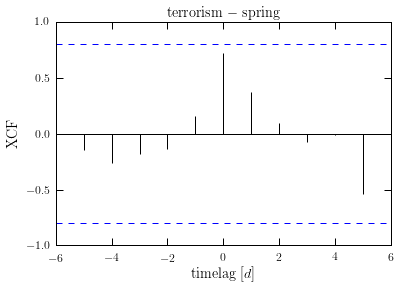

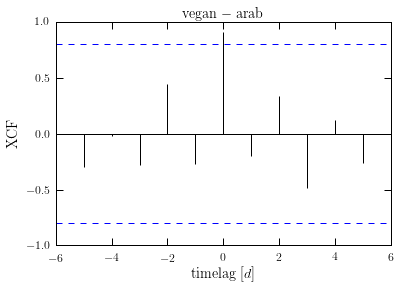

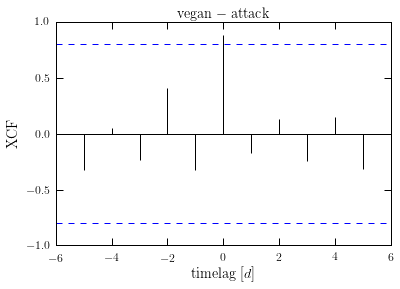

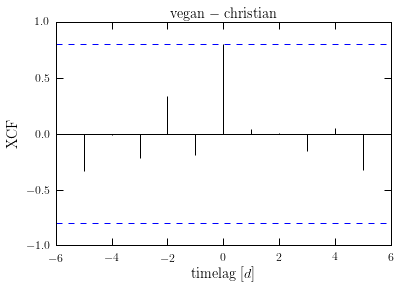

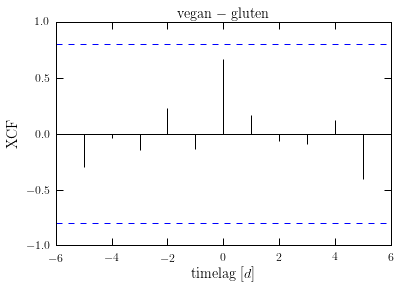

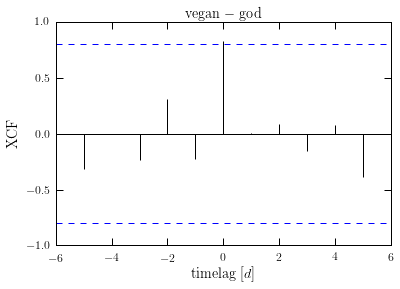

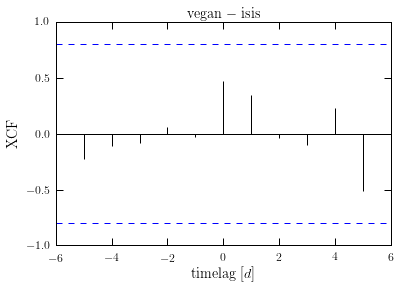

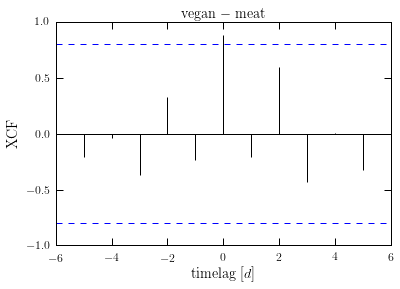

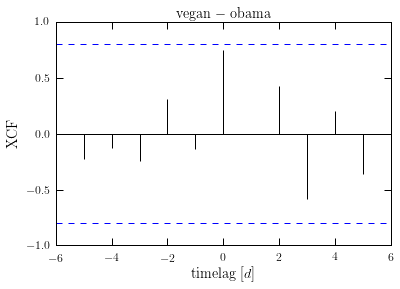

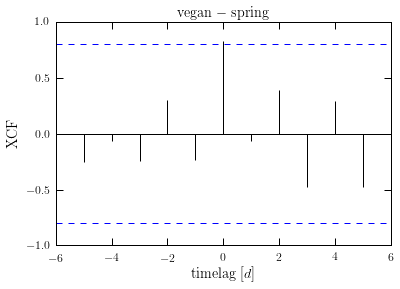

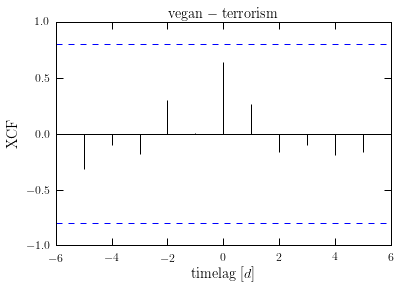

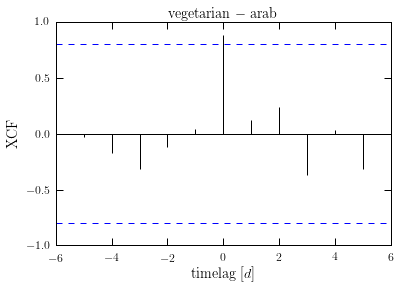

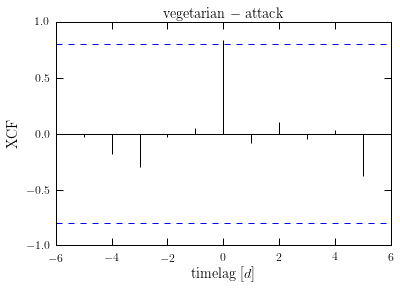

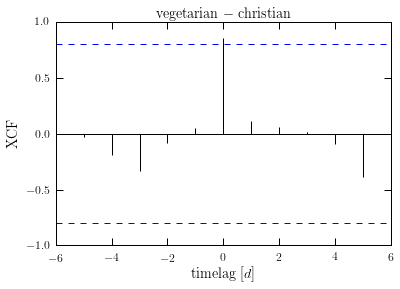

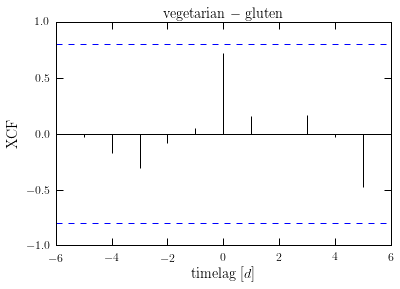

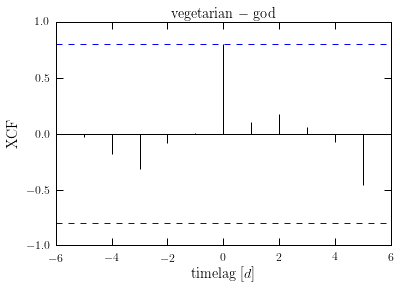

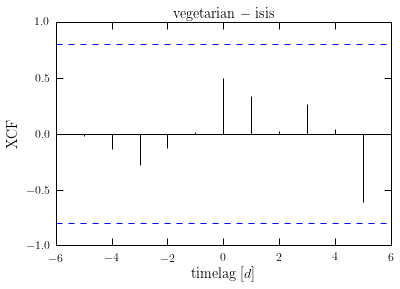

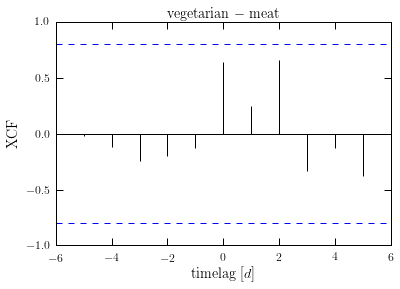

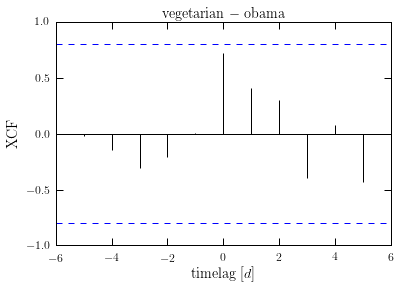

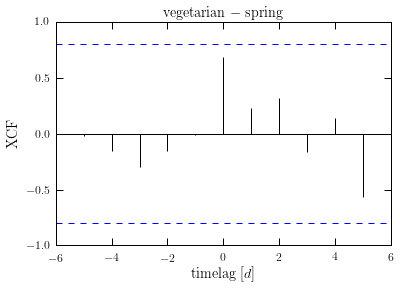

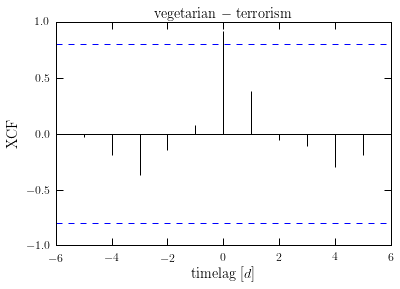

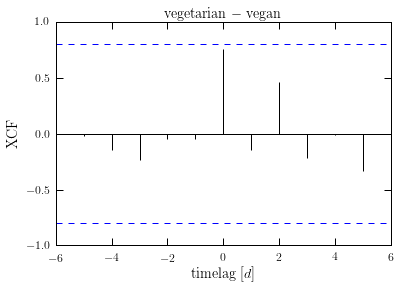

In [19]:
for i in range(len(keys)):
    for j in range(i):
        nsample = difference[i,:].shape[0]
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.xcorr(difference[i,:]-np.mean(difference[i,:]), difference[j,:]-np.mean(difference[j,:]), maxlags=None)
        ax.axhline(y=1.96*np.sqrt(1./nsample), color='b', linestyle='--')
        ax.axhline(y=-1.96*np.sqrt(1./nsample), color='b', linestyle='--')
        ax.set_xlabel(r'$\mathrm{timelag}$ $[d]$')
        ax.set_ylabel(r'$\mathrm{XCF}$')
        ax.set_title(r'$\mathrm{%s}$ $-$ $\mathrm{%s}$'%(keys[i], keys[j]))
        plt.show()

In [20]:
corr = np.zeros((len(keys), len(keys)))
for i in range(len(keys)):
    timedata = difference[i,:]
    for j in range(len(keys)):
        timedata2 = difference[j,:]
        maxcorr = np.amax(autocorr(6, timedata, timedata2))
        mincorr = np.amin(autocorr(6, timedata, timedata2))
        if mincorr*(-1.) > maxcorr:
            maxcorr = mincorr
        corr[i,j] = maxcorr

In [21]:
corr

array([[ 1.        ,  0.90052504,  0.86587864,  0.75232459,  0.85996051,
         0.5982218 ,  0.86258487,  0.92403925,  0.9199834 ,  0.8022066 ,
         0.91100049,  0.88276927],
       [ 0.90052504,  1.        ,  0.96958112,  0.91496991,  0.96977293,
         0.75141969,  0.67760807,  0.73905359,  0.87518055,  0.81275101,
         0.88711947,  0.83913239],
       [ 0.86587864,  0.96958112,  1.        ,  0.96840037,  0.99068063,
         0.83804791,  0.64853872,  0.74449605,  0.86288389,  0.91121585,
         0.80250455,  0.85722891],
       [ 0.75232459,  0.91496991,  0.96840037,  1.        ,  0.96584339,
         0.93925208,  0.51508384,  0.67663397,  0.83647355,  0.85201783,
         0.67122403,  0.72510526],
       [ 0.85996051,  0.96977293,  0.99068063,  0.96584339,  1.        ,
         0.85217682,  0.69247576,  0.7489734 ,  0.88902113,  0.86457653,
         0.83459387,  0.79998944],
       [ 0.5982218 ,  0.75141969,  0.83804791,  0.93925208,  0.85217682,
         1.        ,  